## LDSCI7226: Natural Language Processing with Deep Learning

#### AE2 - Coding assignment

#### Student ID: 23220052

#### Social Media Analysis: Designing, Describing, and Comparing Neural Network Models for Emotion Detection in tweets.

Before starting the assignment, we will be importing all libraries and packages required for our programme solution

- "import os" module to use the operating system dependent functionality allowing us to interact with file systems, manipulate paths and perform operating system-related tasks. (Python documentation, 2024)
- "import urllib" module to retrieve/fetch/workwith data from URLs (Python documentation, 2024)
- "import time" module to work with time-related functions (Python documentation, 2024)
- "import csv" module to work with Comma Separated Values files as well as read and write tabular data in CSV format (Python documentation, 2024)
- "import pandas as pd" library to manipulate and analyse data (W3 School, 2024)
- "import numpy as np" library to perform mathematical operations (W3 School, 2024)
- "import statistics" module to calculate mathematical statistics of numeric data (Python documentation, 2024)
- "import seaborn as sns" data visualization library (based on Matplotlib) to make statistical graphics, explore and understand the data (Seaborn documentation, 2024)
- "import matplotlib.pyplot as plt" module to create different types of plots and charts (Matplotlib documentation, 2024)
- "import request" module to allow us to send HTTP requests (SitePoint, 2024)
- "import zipfile" module to create, read, write and list contents of ZIP archives/files (Real Python, 2023)
- "import re" module to provide regular expression matching operations(Re, 2024)
- "import pickle" module for serializing and deserializing Python objects (Python documentation, 2024)
- "from sklearn.feature_extraction.text import TfidfVectorizer" to convert a collection of raw documents to a matrix of TF-IDF features (scikit, 2024)
- "from sklearn.linear_model import LogisticRegression" to use Logistic Regression classifier (scikit, 2024)
- "from sklearn.model_selection import train_test_split" to split arrays or matrices into random train and test subsets (scikit, 2024)
- "from sklearn.naive_bayes import MultinomialNB" to use Naive Bayes classifier for multinomial models (scikit, 2024)
- "from sklearn.metrics import classification_report" to build a text report showing the main classification metrics (scikit, 2024)
- "from sklearn.feature_extraction.text import CountVectorizer" to convert a collection of text documents to a matrix of token counts (scikit, 2024)
- "from sklearn.metrics import accuracy_score" for accuracy classification score (scikit, 2024)
- "from sklearn.metrics import confusion_matrix, roc_auc_score" to evaluate classification models performance (Stack Overflow, n.d.)
- "from sklearn.svm import SVC" to create a Support Vector Classifier (SVC)(scikit-learn, 2019)
- "from sklearn.neighbors import KNeighborsClassifier" to create a k-nearest neighbors (KNN) classifier (scikit-learn , 2019)
- "from keras.models import Sequential" to create a sequential neural network model in Keras (Stack Overflow, n.d.)
- "from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D" to create various types of layers in a neural network (Stack Overflow, n.d.)
- "from keras.utils import to_categorical" to convert integer labels to one-hot encoded format, which is a binary matrix representation of the class labels (GeeksforGeeks, 2020)
- "from keras.layers import Dropout" to prevent overfitting in neural networks by randomly setting a fraction of input units to 0 at each update during training time (Stack Overflow, n.d.)


In [1]:
#We first import all libraries and packages 

import os 
import urllib
import time 
import csv
import pandas as pd
import numpy as np
import statistics 
import seaborn as sns 
import matplotlib.pyplot as plt
import requests
import zipfile
import re
import pickle
import joblib
import nltk
from sklearn.utils import resample
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from collections import Counter
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, BatchNormalization, Embedding
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, BatchNormalization, Dropout, Dense
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.utils import to_categorical
from keras.layers import Dense, Conv2D, Conv1D, Flatten, MaxPooling2D

In order to detect emotion, we first have to download our dataset, in this case the emotion_sentiment_dataset.csv dataset manually. Once done, we want to load our data from the CSV file.

In [2]:
#We first load our dataset
file_path = "emotion_sentiment_dataset.csv"
tweet_emotions_df = pd.read_csv(file_path)

#Then, we display the first few rows of our dataset
print("First few rows of the dataset:")
print(tweet_emotions_df.head())

First few rows of the dataset:
   Unnamed: 0                                               text  Emotion
0           0  i seriously hate one subject to death but now ...     hate
1           1                 im so full of life i feel appalled  neutral
2           2  i sit here to write i start to dig out my feel...  neutral
3           3  ive been really angry with r and i feel like a...    anger
4           4  i feel suspicious if there is no one outside l...  neutral


##### Code explanation: 

The above code demonstrates the process of loading and inspecting a dataset for our emotion detection project. First, it specifies the file path for our "emotion_sentiment_dataset.csv" dataset. Then, using the read_csv function, it reads our data into "tweet_emotions_df" dataframe. Following this, the code displays the first few rows of our dataset using the head() method, providing an overview of its structure and the type of data it contains.

Then, we decided to evaluate our dataset number of rows.

In [3]:
#We print our dataset number of rows 
num_rows = tweet_emotions_df.shape[0]
print(f"Number of rows in the dataset: {num_rows}")

Number of rows in the dataset: 839555


##### Code explanation: 

The above code determines and prints the number of rows in our dataset. To do that, it initially accesses the shape attribute of our "tweet_emotions_df" dataframe, which returns a tuple representing its dimensions. It then extracts the tuples' first element using shape[0] to obtain our dataset total number of rows which is stored in "num_rows". Finally, it prints the dataset number of rows.

Given the large number of rows in our dataset, we have decided to randomly sample it to 100,000 rows to avoid algorithm intensity and reduce processing time.

In [4]:
#We first ensure reproducibility by setting a random seed
random_seed = 42

#Then we sample our dataset to 100,000 rows
sampled_tweet_emotions_df = tweet_emotions_df.sample(n=100000, random_state=random_seed)

#Finally we print the number of rows in our sampled dataset
num_sampled_rows = sampled_tweet_emotions_df.shape[0]
print(f"Number of rows in the sampled dataset: {num_sampled_rows}")

#And save it to a new CSV file 
sampled_tweet_emotions_df.to_csv('sampled_tweet_emotions_df.csv', index=False)


Number of rows in the sampled dataset: 100000


##### Code explanation: 

The above code randomly samples our dataset, and saves it to a new CSV file, that we will be working on. To do that, we first set a random seed to 42 using the "random_seed variable". Then, we call the sample method on our "tweet_emotions_df" dataframe to randomly select 100,000 rows, that we store in "sampled_tweet_emotions_df". Next, we use the shape attribute to print the number of rows in our sampled dataset. Finally, we save our sampled dataframe to a new CSV file named 'sampled_tweet_emotions_df.csv', excluding the index column. This approach efficiently reduces the dataset size for further processing while maintaining reproducibility.

Then, we examine the unique emotion values of our dataset.

In [5]:
#We examine unique sentiment values 
print("\nUnique sentiment values:")
print(sampled_tweet_emotions_df['Emotion'].unique())


Unique sentiment values:
['neutral' 'love' 'enthusiasm' 'relief' 'sadness' 'empty' 'happiness'
 'fun' 'surprise' 'hate' 'anger' 'boredom' 'worry']


##### Code explanation: 

The above code highlights the unique sentiment values in our sampled dataset. Indeed, it accesses the 'Emotion' column of our "sampled_tweet_emotions_df" dataframe and uses the unique() method to retrieve an array of unique values present in that column. Finally, it prints these unique emotion values, allowing us to understand the different emotion categories represented in our dataset.

Then, we inspect if our dataset contains any missing values.

In [6]:
#We inspect our dataset for missing values
print("\nMissing values in each column:")
print(sampled_tweet_emotions_df.isnull().sum())


Missing values in each column:
Unnamed: 0    0
text          0
Emotion       0
dtype: int64


##### Code explanation: 

The above code inspects our dataset for missing values. First, it calls the isnull() method on our "sampled_tweet_emotions_df" to create a dataframe of the same shape, with boolean values indicating the presence of missing values. Then, it applies the sum() method to the later dataframe to count the number of missing values in each column. Finally, it prints these counts, providing an overview of which columns have missing data and how many missing values they contains.

Then, we check for duplicated rows in our dataset. 

In [7]:
#We then check for duplicated rows
print("\nNumber of duplicated rows:")
print(sampled_tweet_emotions_df.duplicated().sum())


Number of duplicated rows:
0


##### Code explanation: 

The above code checks for duplicated rows in our dataset. It first calls the duplicated() method on our "sampled_tweet_emotions_df" dataframe to create a boolean series indicating whether each row is a duplicate. Then, the sum() method is applied to this series in order to count the number of duplicated rows. Finally, it prints this count, allowing us to see how many duplicated rows are present in our dataset.

After that, we decided to drop the index column from our dataset, as it does not add any value to our analysis.

In [8]:
#We drop the index column 
sampled_tweet_emotions_df = sampled_tweet_emotions_df.drop(sampled_tweet_emotions_df.columns[0], axis=1)
print(sampled_tweet_emotions_df.head())


                                                     text     Emotion
388803  i do feel like i am alot more outgoing then i ...     neutral
79052   i go back and face the home in that ruined sta...     neutral
736807          i feel the amount allocated is inadequate     neutral
114142  im feeling very mellow and affectionate right now        love
64730   i feel their anticipation on the update and i ...  enthusiasm


##### Code explanation: 

The above code drops the index column from our dataset. Initially, the drop method is called on our "sampled_tweet_emotions_df" dataframe, specifying the first column (index 0) to be removed, and axis=1 to indicate that a column is being dropped. Our updated dataframe, without the index column, is then assigned back to our "sampled_tweet_emotions_df", and it finally prints its first few rows using the head() method on our updated dataframe, allowing us to verify that the index column has been successfully removed.

After that, we decided to generate a emotion value count of our dataset. 

Emotion Value Counts:
Emotion
neutral       80396
love           4804
happiness      3163
sadness        2069
relief         2010
hate           1786
anger          1470
fun            1199
enthusiasm     1101
surprise        787
empty           664
worry           537
boredom          14
Name: count, dtype: int64


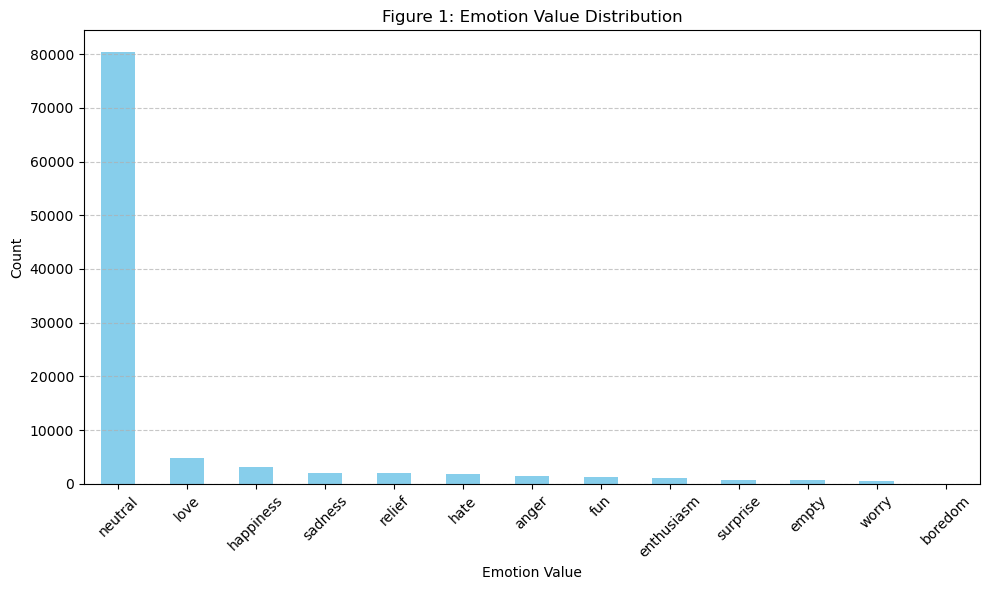

In [9]:
#We first generate an emotion value count
emotion_counts = sampled_tweet_emotions_df['Emotion'].value_counts()

#Print it
print("Emotion Value Counts:")
print(emotion_counts)

#And plot it
plt.figure(figsize=(10, 6))
emotion_counts.plot(kind='bar', color='skyblue')
plt.title('Figure 1: Emotion Value Distribution')
plt.xlabel('Emotion Value')
plt.ylabel('Count')
plt.xticks(ticks=range(len(emotion_counts.index)), labels=emotion_counts.index, rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Code explanation: 

The above code analyzes and visualizes the distribution of emotion values in our dataset. To do that, it first generates a count of each unique emotion value in our dataset using the value_counts() method on our 'Emotion' column, then stores the result in the emotion_counts variable. These counts are then printed to provide a numerical overview of the emotion distribution. Subsequently, the code creates a bar plot to visually represent this distribution. Titles and axis labels are added for clarity, and the x-axis tick labels are rotated for better readability. Finally, the plot is displayed, offering a clear visual summary of the emotion value distribution in our dataset.

--> Please note that we clearly notice a data imbalance, specifically for the “neutral” emotion. This can impact the performance of any emotion analysis models trained on this dataset, we decided to address it by downsampling our 'neutral' class to a mean count in order to improve model accuracy and fairness.

In [10]:
#We first separate majority and minority classes
df_majority = sampled_tweet_emotions_df[sampled_tweet_emotions_df.Emotion == 'neutral']
df_minority = sampled_tweet_emotions_df[sampled_tweet_emotions_df.Emotion != 'neutral']

#We then determine the mean number of samples for the minority class
mean_count = int(df_minority['Emotion'].value_counts().mean())

#And under-sample the majority class to match the minority class count
df_majority_downsampled = resample(df_majority, 
                                   replace=False,    
                                   n_samples=mean_count,  
                                   random_state=42)  

#Then, we combine minority class with downsampled majority class
sampled_tweet_emotions_balanced_df = pd.concat([df_majority_downsampled, df_minority])

#We shuffle our dataset to mix the classes
sampled_tweet_emotions_balanced_df = sampled_tweet_emotions_balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

#And save the balanced dataframe to our original dataframe
sampled_tweet_emotions_df = sampled_tweet_emotions_balanced_df

#And check our balanced class distribution
balanced_emotion_counts = sampled_tweet_emotions_df['Emotion'].value_counts()
print("Balanced Emotion Value Counts:")
print(balanced_emotion_counts)



Balanced Emotion Value Counts:
Emotion
love          4804
happiness     3163
sadness       2069
relief        2010
hate          1786
neutral       1633
anger         1470
fun           1199
enthusiasm    1101
surprise       787
empty          664
worry          537
boredom         14
Name: count, dtype: int64


##### Code explanation: 

The above code balances our "sampled_tweet_emotions_df", which has a significant imbalance between the majority class ('neutral') and minority classes (other emotions). It first separates the majority class ('neutral') from the minority classes. The mean number of samples for the minority classes is calculated to determine a target count for downsampling. The majority class is then downsampled to match this mean count, effectively reducing its size to avoid dominance in the dataset. After downsampling, the majority and minority classes are combined into a single balanced dataframe. The combined dataset is shuffled to mix the classes well, ensuring that their order does not bias the model training. Finally, the balanced dataframe is saved, and the new class distribution is printed to confirm the changes. 

Then, we decided to create a dictionary of common chat words that are likely to appear in tweets.

In [11]:
#We define a dictionary of common chat word mappings
chat_words = {
    "AFAIK": "As Far As I Know",
    "AFK": "Away From Keyboard",
    "ASAP": "As Soon As Possible",
    "ATK": "At The Keyboard",
    "ATM": "At The Moment",
    "A3": "Anytime, Anywhere, Anyplace",
    "BAK": "Back At Keyboard",
    "BBL": "Be Back Later",
    "BBS": "Be Back Soon",
    "BFN": "Bye For Now",
    "B4N": "Bye For Now",
    "BRB": "Be Right Back",
    "BRT": "Be Right There",
    "BTW": "By The Way",
    "B4": "Before",
    "B4N": "Bye For Now",
    "CU": "See You",
    "CUL8R": "See You Later",
    "CYA": "See You",
    "FAQ": "Frequently Asked Questions",
    "FC": "Fingers Crossed",
    "FWIW": "For What It's Worth",
    "FYI": "For Your Information",
    "GAL": "Get A Life",
    "GG": "Good Game",
    "GN": "Good Night",
    "GMTA": "Great Minds Think Alike",
    "GR8": "Great!",
    "G9": "Genius",
    "IC": "I See",
    "ICQ": "I Seek you (also a chat program)",
    "ILU": "ILU: I Love You",
    "IMHO": "In My Honest/Humble Opinion",
    "IMO": "In My Opinion",
    "IOW": "In Other Words",
    "IRL": "In Real Life",
    "KISS": "Keep It Simple, Stupid",
    "LDR": "Long Distance Relationship",
    "LMAO": "Laugh My A.. Off",
    "LOL": "Laughing Out Loud",
    "LTNS": "Long Time No See",
    "L8R": "Later",
    "MTE": "My Thoughts Exactly",
    "M8": "Mate",
    "NRN": "No Reply Necessary",
    "OIC": "Oh I See",
    "PITA": "Pain In The A..",
    "PRT": "Party",
    "PRW": "Parents Are Watching",
    "QPSA?": "Que Pasa?",
    "ROFL": "Rolling On The Floor Laughing",
    "ROFLOL": "Rolling On The Floor Laughing Out Loud",
    "ROTFLMAO": "Rolling On The Floor Laughing My A.. Off",
    "SK8": "Skate",
    "STATS": "Your sex and age",
    "ASL": "Age, Sex, Location",
    "THX": "Thank You",
    "TTFN": "Ta-Ta For Now!",
    "TTYL": "Talk To You Later",
    "U": "You",
    "U2": "You Too",
    "U4E": "Yours For Ever",
    "WB": "Welcome Back",
    "WTF": "What The F...",
    "WTG": "Way To Go!",
    "WUF": "Where Are You From?",
    "W8": "Wait...",
    "7K": "Sick:-D Laugher",
    "TFW": "That feeling when",
    "MFW": "My face when",
    "MRW": "My reaction when",
    "IFYP": "I feel your pain",
    "TNTL": "Trying not to laugh",
    "JK": "Just kidding",
    "IDC": "I don't care",
    "ILY": "I love you",
    "IMU": "I miss you",
    "ADIH": "Another day in hell",
    "ZZZ": "Sleeping, bored, tired",
    "WYWH": "Wish you were here",
    "TIME": "Tears in my eyes",
    "BAE": "Before anyone else",
    "FIMH": "Forever in my heart",
    "BSAAW": "Big smile and a wink",
    "BWL": "Bursting with laughter",
    "BFF": "Best friends forever",
    "CSL": "Can't stop laughing"
}

##### Code explanation: 

The above code defines a "chat_words" dictionary that maps common chat abbreviations and acronyms to their full meanings. Indeed, each key in the dictionary represents a popular chat shorthand used in text communication, while the corresponding value provides the expanded form of the abbreviation. This dictionary is useful as it can enhance text processing and understanding in applications such as social media analysis.

Then, we replace any chat words in our dataset with their full forms.

In [12]:
#We create a copy of our text column
text_series = sampled_tweet_emotions_df['text']

#Then, we replace chat words with their full forms
for chat_word, full_form in chat_words.items():
    text_series = text_series.str.replace(r'\b' + chat_word + r'\b', full_form, case=False)

#And assign the modified series back to our dataframe
sampled_tweet_emotions_df['text'] = text_series

#And finally print our updated dataframe
print(sampled_tweet_emotions_df.head())


                                                text  Emotion
0  i feel like weve lost touch but i know we stil...     love
1  i am here today feeling very honoured to be sh...     love
2       im feeling a little pissed or just plain sad  sadness
3  im feeling kind of tender headed so i will hav...   relief
4  i feel like writing you a letter but thats not...    anger


##### Code explanation: 

The above code replaces common chat abbreviations present in our dataset with their full forms. To do that, it first creates a copy of our "text" column from our "sampled_tweet_emotions_df" dataframe and stores it in "text_series" variable. Then, for each abbreviation in our predefined "chat_words" dictionary, it uses the str.replace() method to replace them with their full form. The r'\b' syntax ensures that only whole words are replaced, avoiding partial matches, while case=False allows for case-insensitive replacements. After processing all chat words, our code assigns the modified series back to our "text" column in our "sampled_tweet_emotions_df" dataframe, and finally prints it.

Once done, we now preprocess our dataset. 

In [13]:
#We first download NLTK data files
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#And initialize preprocessing tools
stop_words = set(stopwords.words('english'))
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

#Then we process each text entry in our dataframe
for index, row in sampled_tweet_emotions_df.iterrows():
    text = row['text']

    #We first remove URL 
    text = re.sub(r'\[.*?\]', '', text)

    #Then, we convert text to lowercase
    text = text.lower()
    
    #And remove non-alphabetic characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)

    #And numbers
    text = re.sub(r'\d+', '', text)
    
    #Then, we tokenize our text into words
    tokens = word_tokenize(text)
    
    #Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]
    
    #After that, we stem words
    stemmed_tokens = [stemmer.stem(word) for word in tokens]
    
    #And lemmatize them
    lemmatized_tokens = [lemmatizer.lemmatize(word) for word in stemmed_tokens]
    
    #Finally, we join tokens back into a single string
    clean_text = ' '.join(lemmatized_tokens)
    
    #And update our original dataframe with the cleaned text
    sampled_tweet_emotions_df.at[index, 'text'] = clean_text

#Then, we display our dataframe first few rows after preprocessing
print("\nFirst few rows after preprocessing:")
print(sampled_tweet_emotions_df.head())

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ghitahousni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ghitahousni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ghitahousni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!



First few rows after preprocessing:
                                                text  Emotion
0          feel like weve lost touch know still love     love
1  today feel honour share card made guest design...     love
2                       im feel littl piss plain sad  sadness
3  im feel kind tender head spray bit leav condit...   relief
4  feel like write letter that know feel fuck ang...    anger


##### Code explanation: 

The above code performs preprocessing on each "text" column of our "sampled_tweet_emotions_df" dataframe. To do that, it first downloads necessary NLTK data files, including 'punkt' for tokenization, 'stopwords' for removing common words, and 'wordnet' for lemmatization. Then, it initializes required preprocessing tools, such as English stopwords, the Porter stemmer for stemming words, and a WordNet lemmatizer for lemmatizing words. Then, our code iterates over each row of our dataframe, and processes the text. Indeed, it starts by removing non-alphabetic characters using a regular expression, then converts our text to lowercase, tokenized it into words, and filters out stopwords. Then, each token is stemmed and lemmatized to reduce words to their base forms. Once done, the processed tokens are joined back into a single string, and the "text" column in our "sampled_tweet_emotions_df" dataframe is updated with this cleaned text. Finally, the code prints the first few rows of our dataframe after preprocessing.

After that, we decided to explore and visualize the top 5 words for each unique emotion. This approach will helps us understand the vocabulary commonly linked to each emotion, hence providing insights into the specific terms used in the context of different emotions.

/var/folders/b7/xhsvblhn5h94lxqtrtnvnw1w0000gn/T/ipykernel_24232/157229854.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_words.keys()), y=list(top_5_words.values()), palette='viridis', edgecolor='black', linewidth=1.5, ax=ax)
/var/folders/b7/xhsvblhn5h94lxqtrtnvnw1w0000gn/T/ipykernel_24232/157229854.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(top_5_words.keys()), y=list(top_5_words.values()), palette='viridis', edgecolor='black', linewidth=1.5, ax=ax)
/var/folders/b7/xhsvblhn5h94lxqtrtnvnw1w0000gn/T/ipykernel_24232/157229854.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` vari

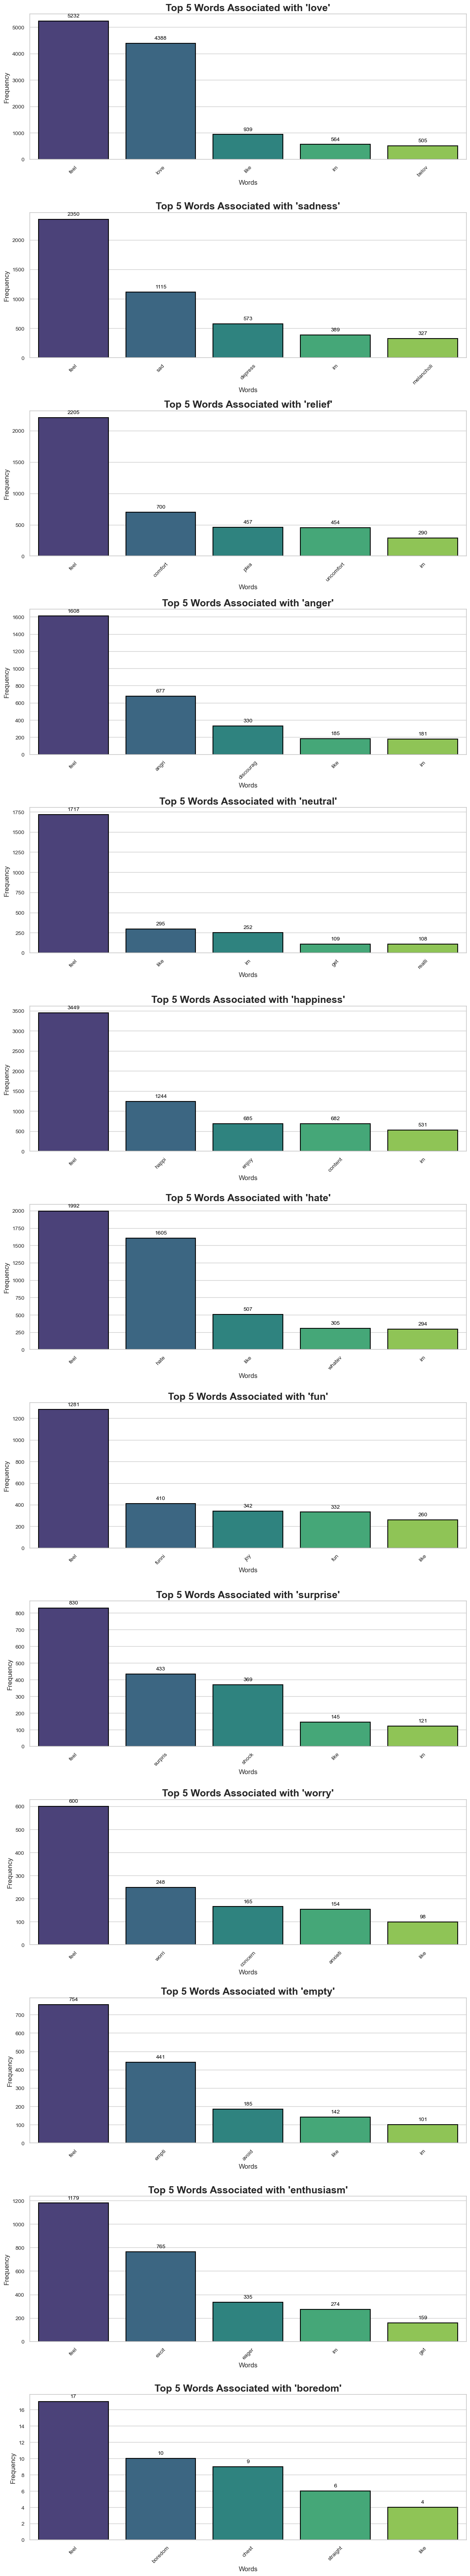

In [14]:
#We first define the unique emotions in our dataframe
unique_emotions = sampled_tweet_emotions_df['Emotion'].unique()

#Then set the theme for the plots
sns.set_theme(style="whitegrid")

#To create a figure with multiple subplots
fig, axes = plt.subplots(nrows=len(unique_emotions), ncols=1, figsize=(12, 5 * len(unique_emotions)))
fig.tight_layout(pad=5.0) 

#Then, for each emotion
for ax, emotion in zip(axes, unique_emotions):
    #We filter the texts for the current emotion
    emotion_texts = sampled_tweet_emotions_df[sampled_tweet_emotions_df['Emotion'] == emotion]['text']

    #Tokenize it and count the frequency of each word
    words = [word.lower() for text in emotion_texts for word in word_tokenize(text) if word.isalpha()]
    word_freq = Counter(words)

    #Get the top 5 words
    top_5_words = dict(word_freq.most_common(5))

    #And create a bar plot 
    sns.barplot(x=list(top_5_words.keys()), y=list(top_5_words.values()), palette='viridis', edgecolor='black', linewidth=1.5, ax=ax)

    #As well as annotate bars with frequency values
    for container in ax.containers:
        ax.bar_label(container, label_type="edge", color="black", fontsize=10, padding=5)

    ax.set_title(f"Top 5 Words Associated with '{emotion}'", fontsize=18, fontweight='bold')
    ax.set_xlabel("Words", fontsize=12)
    ax.set_ylabel("Frequency", fontsize=12)
    ax.tick_params(axis='x', rotation=45, labelsize=10)
    ax.tick_params(axis='y', labelsize=10)

#Finally, we adjust layout and show plot
plt.tight_layout()
plt.show()

##### Code explanation: 

The above code generates bar plots showing the top 5 most frequent words associated with each unique emotion in our dataset. To do that, it first defines the unique emotions found in our 'Emotion' column of "sampled_tweet_emotions_df" dataframe. Then it sets up the aesthetic style for the plot using the sns.set_theme() function and creates one subplot per unique emotion using plt.subplots(). Then, for each emotion, it extracts texts corresponding to that emotion, tokenizes them, count the frequency of each word, and identifies the top 5 most frequent words using the Counter class. Finally, it generates a bar plot for each emotion using sns.barplot(), displaying the top 5 words and their frequencies before displaying the plots. 

Now we will proceed with the mapping of our dataset emotions based on the below: 

- Neutral = 0
- Love = 1
- Happiness = 2
- Sadness = 3
- Relief = 4
- Hate = 5
- Anger = 6
- Fun = 7
- Enthusiasm = 8
- Surprise = 9
- Empty = 10
- Worry = 11
- Boredom = 12 

In [15]:
#We first define the emotion mapping
emotion_mapping = {
    'neutral': 0, 'love': 1, 'happiness': 2, 'sadness': 3,
    'relief': 4, 'hate': 5, 'anger': 6, 'fun': 7,
    'enthusiasm': 8, 'surprise': 9, 'empty': 10, 'worry': 11, 'boredom': 12
}

#And then convert our "Emotion" column to numerical values using the above mapping
sampled_tweet_emotions_df['Emotion'] = sampled_tweet_emotions_df['Emotion'].map(emotion_mapping)
print(sampled_tweet_emotions_df.head())

                                                text  Emotion
0          feel like weve lost touch know still love        1
1  today feel honour share card made guest design...        1
2                       im feel littl piss plain sad        3
3  im feel kind tender head spray bit leav condit...        4
4  feel like write letter that know feel fuck ang...        6


##### Code explanation: 

The above code converts our emotion labels in the 'Emotion' column of our "sampled_tweet_emotions_df" dataframe to numerical values. To do that, it first defines a dictionary "emotion_mapping", where each emotion is mapped to a unique value. Then, it uses this mapping to replace the emotion labels in our 'Emotion' column with their corresponding numerical values by applying the map() method. Finally, it prints our updated dataframe, demonstrating the transformation from categorical emotion labels to numerical values.

Following that, we split our dataset into training (70%), testing (25%) and deployment data (5%). 

In [16]:
#We first define our data and labels
data = sampled_tweet_emotions_df['text']
labels = sampled_tweet_emotions_df['Emotion']

#Then, we split our data into training (70%) and temporal (30%)
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.3, random_state=42)

#Following that, we split our temporal data into testing (25%) and deployment (5%)
X_test, X_deploy, y_test, y_deploy = train_test_split(X_test, y_test, test_size=1/6, random_state=42)  

#Then, we print the sizes of each dataset
print(f"Training data shape: {X_train.shape}")
print("Training data sample:")
print(X_train[:5])

print(f"\nTesting data shape: {X_test.shape}")
print("Testing data sample:")
print(X_test[:5])

print(f"\nDeployment data shape: {X_deploy.shape}")
print("Deployment data sample:")
print(X_deploy[:5])

Training data shape: (14865,)
Training data sample:
5343     im high drunk im ok ish part im one three thin...
11526     feel quit plea result peopl ask actual made lace
21208                              still feel confid excit
8350         tendenc feel extrem stress tri avoid feel way
1566     feel realli dislik feel realli hate feel need ...
Name: text, dtype: object

Testing data shape: (5310,)
Testing data sample:
1661                              happi feel welcom creepi
6285         go feel need delici alcohol beverag two three
2733     feel like terrif compani old school grip someo...
15714    drew list stuff realli want get done ask three...
12862    still feel empti insid without im grate time i...
Name: text, dtype: object

Deployment data shape: (1062,)
Deployment data sample:
16408    stress make sure well peopl satisfi work rush ...
1303      listen station hopeless feel hopeless feel enjoy
3277     feel though lost signific part open mind due n...
4547                   

##### Code explanation: 

The above code performs data splitting to our dataset into training, testing, and deployment datasets. To do that, it first defines data and labels, which correspond to the 'text' and 'Emotion' columns from our "sampled_tweet_emotions_df" dataframe, respectively. Then, it first split our dataset into training (70%) and temporary (30%) sets using train_test_split() function, with a fixed random seed of 42 to ensure reproducibility. Next, the temporary set is further divided into testing (25%) and deployment (5%) sets. Finally, our code prints the shapes and samples of each dataset to provide an overview of their sizes and contents, which helps us verify the correctly split and that each subset is properly prepared for model training, evaluation, and deployment.

Then, we thought it would be interesting to generate emotion value counts for each dataset.

In [17]:
#We first generate emotion value counts for each dataset
train_emotion_counts = y_train.value_counts()
test_emotion_counts = y_test.value_counts()
deploy_emotion_counts = y_deploy.value_counts()

#And print them
print("Training Set Emotion Value Counts:")
print(train_emotion_counts)
print("\nTesting Set Emotion Value Counts:")
print(test_emotion_counts)
print("\nDeployment Set Emotion Value Counts:")
print(deploy_emotion_counts)


Training Set Emotion Value Counts:
Emotion
1     3365
2     2208
3     1439
4     1421
5     1249
0     1146
6     1017
7      842
8      774
9      562
10     447
11     385
12      10
Name: count, dtype: int64

Testing Set Emotion Value Counts:
Emotion
1     1197
2      782
3      531
4      474
5      458
0      406
6      385
7      293
8      270
9      193
10     188
11     130
12       3
Name: count, dtype: int64

Deployment Set Emotion Value Counts:
Emotion
1     242
2     173
4     115
3      99
0      81
5      79
6      68
7      64
8      57
9      32
10     29
11     22
12      1
Name: count, dtype: int64


##### Code explanation: 

The above code calculates and displays the distribution of emotion values in each dataset (training, testing, and deployment). It first computes the count of each emotion label within the training set (y_train), testing set (y_test), and deployment set (y_deploy) using the value_counts() method. Then it prints these value counts for each dataset, providing a clear overview of the distribution of emotion labels across the different sets. This step is crucial for understanding the balance of emotion categories in each subset, which can impact model performance and evaluation.

As well as generate an emotion distribution plot for each split dataset. 

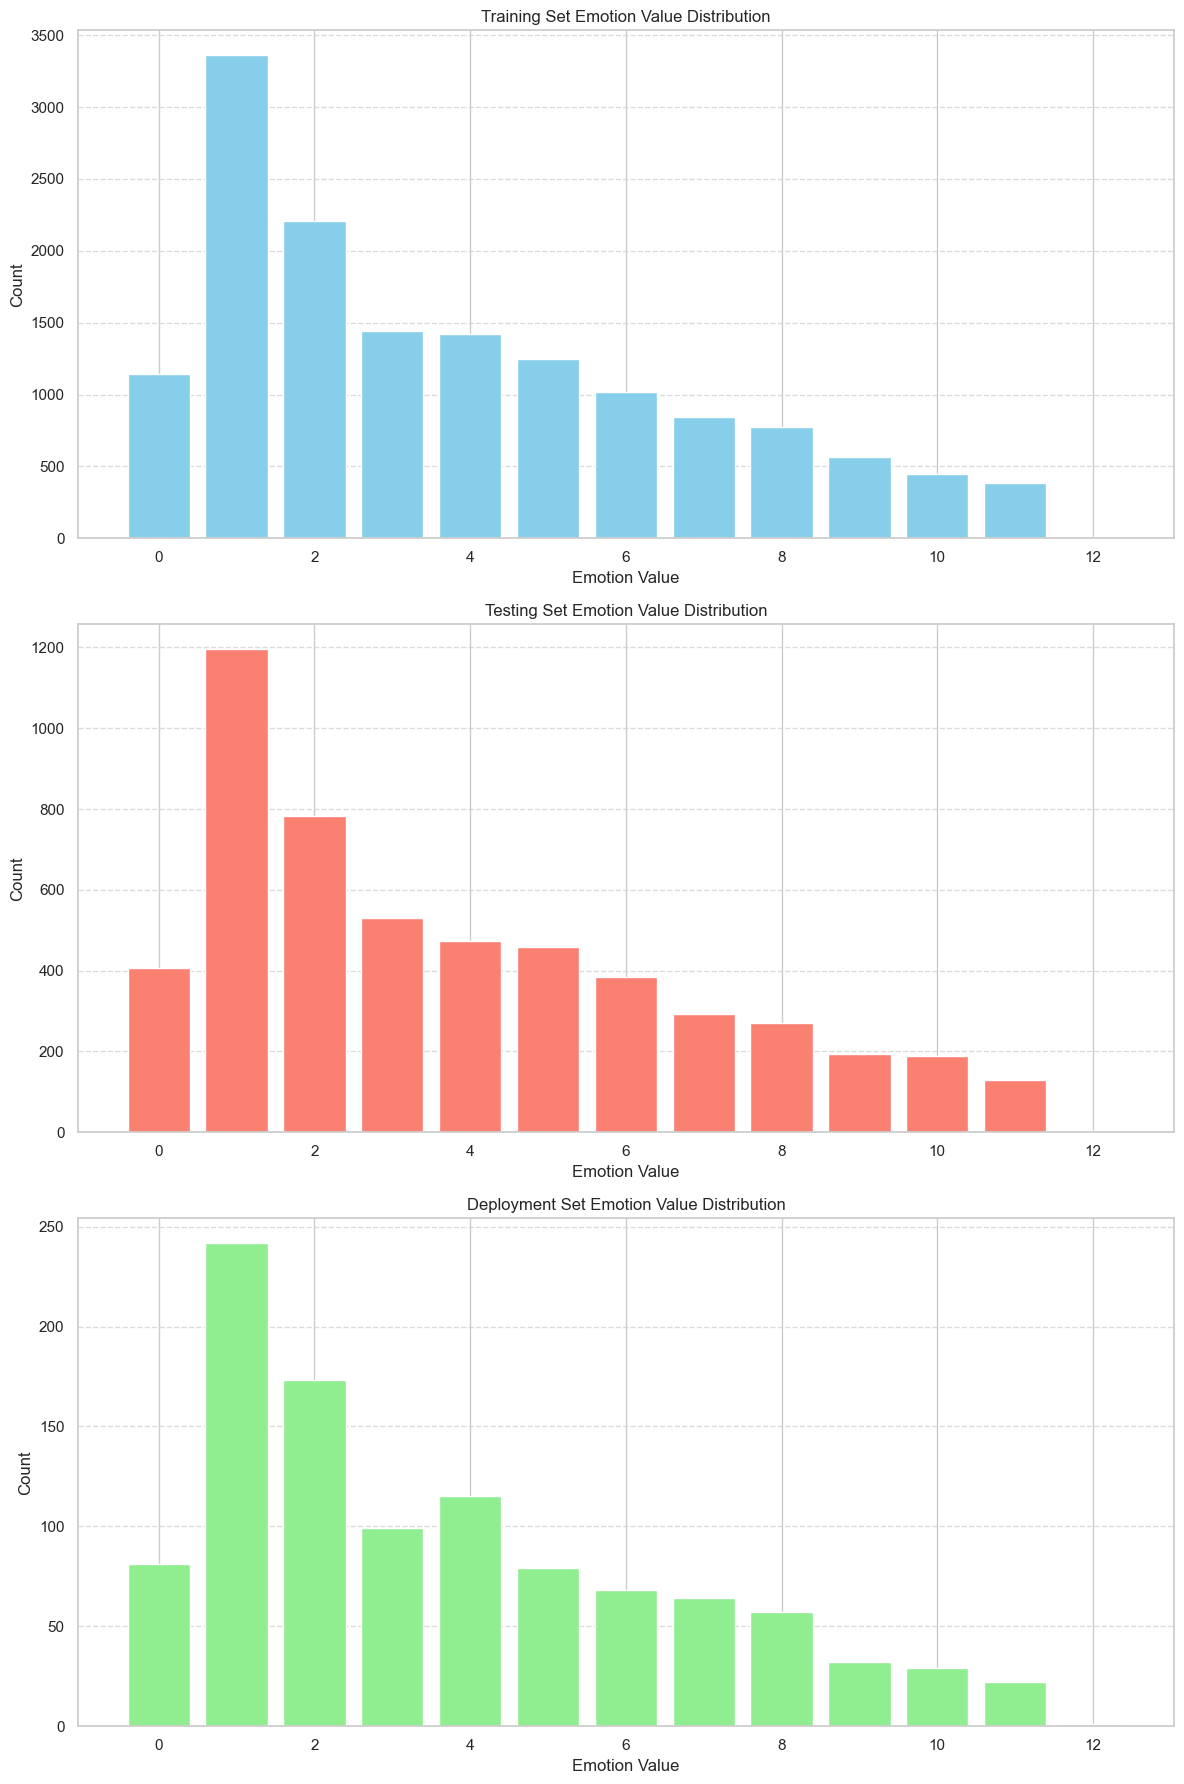

In [18]:
#We first plot emotion distributions for each dataset
fig, axs = plt.subplots(3, 1, figsize=(12, 18))

#Training Set
axs[0].bar(train_emotion_counts.index, train_emotion_counts.values, color='skyblue')
axs[0].set_title('Training Set Emotion Value Distribution')
axs[0].set_xlabel('Emotion Value')
axs[0].set_ylabel('Count')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

#Testing Set
axs[1].bar(test_emotion_counts.index, test_emotion_counts.values, color='salmon')
axs[1].set_title('Testing Set Emotion Value Distribution')
axs[1].set_xlabel('Emotion Value')
axs[1].set_ylabel('Count')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

#Deployment Set
axs[2].bar(deploy_emotion_counts.index, deploy_emotion_counts.values, color='lightgreen')
axs[2].set_title('Deployment Set Emotion Value Distribution')
axs[2].set_xlabel('Emotion Value')
axs[2].set_ylabel('Count')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

Then, we pad sequences for each dataset. 

In [19]:
#We first initialize Tokenizer
tokenizer = Tokenizer(num_words=60000)
tokenizer.fit_on_texts(X_train) 

#To convert texts to sequences
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)
X_deploy_sequences = tokenizer.texts_to_sequences(X_deploy)

#Then, we define maximum sequence length
maxlen_train = max(len(tokens) for tokens in X_train_sequences)
maxlen_test = max(len(tokens) for tokens in X_test_sequences)
maxlen_deploy = max(len(tokens) for tokens in X_deploy_sequences)

print("Maximum sequence length for training:", maxlen_train)
print("Maximum sequence length for testing:", maxlen_test)
print("Maximum sequence length for deployment:", maxlen_deploy)


Maximum sequence length for training: 40
Maximum sequence length for testing: 31
Maximum sequence length for deployment: 33


We realise that the maximum sequence length is the one for testing, therefore we padd our sequences based on that.

In [20]:
#Then, we pad sequences
X_train_padded = pad_sequences(X_train_sequences, maxlen=maxlen_train)
X_test_padded = pad_sequences(X_test_sequences, maxlen=maxlen_train)
X_deploy_padded = pad_sequences(X_deploy_sequences, maxlen=maxlen_train)

#And check their shapes before printing them
print(f"Padded Training data shape: {X_train_padded.shape}")
print(f"Padded Training data: {X_train_padded}")

print(f"\nPadded Testing data shape: {X_test_padded.shape}")
print(f"Padded Testing data: {X_test_padded}")

print(f"\nPadded Deployment data shape: {X_deploy_padded.shape}")
print(f"Padded Deployment data: {X_deploy_padded}")

Padded Training data shape: (14865, 40)
Padded Training data: [[   0    0    0 ...    1  482   26]
 [   0    0    0 ...   94   64 4027]
 [   0    0    0 ...    1  334   27]
 ...
 [   0    0    0 ...   24 2279  660]
 [   0    0    0 ...    1   65  106]
 [   0    0    0 ...    1 1211   40]]

Padded Testing data shape: (5310, 40)
Padded Testing data: [[   0    0    0 ...    1  520 4994]
 [   0    0    0 ... 2963  184  559]
 [   0    0    0 ...  214  260  513]
 ...
 [   0    0    0 ...    1  246  110]
 [   0    0    0 ...  195 1938   47]
 [   0    0    0 ...   77   10  202]]

Padded Deployment data shape: (1062, 40)
Padded Deployment data: [[   0    0    0 ...  112    8   46]
 [   0    0    0 ...  463    1   30]
 [   0    0    0 ...  147 3753   10]
 ...
 [   0    0    0 ...   10    1  338]
 [   0    0    0 ...  194  342   62]
 [   0    0    0 ...   66  233 1442]]


##### Code explanation: 

The above code prepares text data for use in a NN by converting and padding sequences. It first initializes a Tokenizer with a vocabulary size limit of 60,000 words. Then, the tokenizer is fitted on the training, testing and deploy data to build the word index. Then, the code converts the text data from the training, testing, and deployment sets into sequences of integers using the texts_to_sequences() method. This means that each text is transformed into a sequence of token IDs based on the tokenizer's vocabulary. After that, the maximum sequence length for each dataset is determined by finding the length of the longest sequence in each set. Then, the code uses the pad_sequences() function to pad all sequences to ensure they are of uniform length (in this case the testing one as it has the maximum length). Finally, it prints the maximum sequence length, shapes along with a sample of the padded data for each dataset. 

We then define the input size for the embedding layer before defining our NN models.

In [21]:

input_size = np.max(X_train_padded) + 1
print("Input size for the embedding layer:", input_size)

Input size for the embedding layer: 10227


##### Code explanation: 

The above code calculates and displays the input size for the embedding layer of a NN. It first determines the maximum integer value in the padded training sequences (X_train_padded) using np.max(), which represents the highest index value in the tokenized data. Since the input size for the embedding layer needs to account for all possible token indices, the code adds 1 to this maximum value. The resulting value, stored in input_size, represents the total number of distinct tokens that the embedding layer will need to handle. This input size is essential for initializing the embedding layer, as it defines the vocabulary size that the layer will use to map token indices to dense vectors. The code then prints this input size, providing insight into the size of the embedding matrix required for the model.

Then, based on our literature review, we define our RNN-GRU model, train it on our training data, test it on our testing data and deploy it on our deployment data. 

In [22]:
#We first define our model
model_rnn = Sequential()

#Them, add an embedding layer 
model_rnn.add(Embedding(input_dim=input_size, output_dim=100,input_shape=(79,)))

#As well as a bidirectional-GRU layer
model_rnn.add(Bidirectional(GRU(128)))  

#A batch normalization layer
model_rnn.add(BatchNormalization())

#A dropout regularization
model_rnn.add(Dropout(0.5))

#A dense layer with 64 units and ReLU activation
model_rnn.add(Dense(64, activation='relu'))

#Another dropout regularization
model_rnn.add(Dropout(0.5))

#and an output layer with 6 units for 6 labels and softmax activation
model_rnn.add(Dense(13, activation='softmax'))

#We then compile it
model_rnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#And display our model summary
model_rnn.summary()

/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 79, 100)        │     1,022,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 256)            │       176,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │           845 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,217,657 (4.64 MB)

 Trainable params: 1,217,145 (4.64 MB)

 Non-trainable params: 512 (2.00 KB)

##### Code explanation: 

The above code defines and configures a Recurrent Neural Network (RNN) model. It first creates a Sequential model, which is a linear stack of layers. Then add different layers: the first one is an Embedding layer, which transforms integer sequences into dense vectors of a fixed size (100-dimensional in this case), with an input_dim parameter set to input_size, which represents the number of unique tokens in the dataset, and input_shape is defined to handle sequences of length 79. The second layer added is a Bidirectional one that wraps a GRU (Gated Recurrent Unit) layer with 128 units, enabling the model to learn dependencies in both forward and backward directions within the sequence. Following that, a BatchNormalization layer is added to normalize activations and improve training stability. This is followed by a Dropout layer with a dropout rate of 0.5 to prevent overfitting by randomly setting half of the input units to zero during training. Then, our model includes a Dense layer with 64 units and ReLU (Rectified Linear Unit) activation, followed by another Dropout layer with a 0.5 dropout rate. Finally, an output Dense layer with 13 units and softmax activation is added to classify the data into 13 categories. After that, the model is compiled using the Adam optimizer, sparse categorical cross-entropy loss function, and accuracy metric, and a model_rnn.summary() function is called to display the model's architecture, including the number and types of layers, output shapes, and the total number of parameters.

In [23]:
#We then train our model
rnn_history = model_rnn.fit(X_train_padded, y_train, epochs=20, batch_size=32, validation_data=(X_test_padded, y_test),callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 16s 32ms/step - accuracy: 0.4358 - loss: 1.7665 - val_accuracy: 0.2441 - val_loss: 5.0863
Epoch 2/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9158 - loss: 0.3278 - val_accuracy: 0.3652 - val_loss: 14.1342
Epoch 3/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9607 - loss: 0.1520 - val_accuracy: 0.3887 - val_loss: 5.1118
Epoch 4/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 17s 36ms/step - accuracy: 0.9653 - loss: 0.1384 - val_accuracy: 0.7156 - val_loss: 1.0819
Epoch 5/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 18s 39ms/step - accuracy: 0.9767 - loss: 0.1004 - val_accuracy: 0.6363 - val_loss: 1.1159
Epoch 6/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9759 - loss: 0.0931 - val_accuracy: 0.8693 - val_loss: 0.4891
Epoch 7/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9797 - loss: 0.0750 - val_accuracy: 0.6426 - val_loss: 1.9100
Epoch 8/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.9819 - loss: 0.0622 -

##### Code explanation: 

The code above trains our defined RNN model using the fit method. Indeed, our model_rnn.fit function is called to start the training process, where X_train_padded and y_train represent the training data and corresponding labels, respectively. The model is trained for 20 epochs with a batch size of 32. During training, the model's performance is evaluated on a validation set, which consists of X_test_padded and y_test, to monitor how well it generalizes to unseen data. The EarlyStopping callback is used with a patience parameter of 3, which means that training will be halted if there is no improvement in the validation loss for 3 consecutive epochs. Then, the training process returns a history object, rnn_history, which contains details about the training and validation performance for each epoch, useful for assessing the model's learning progress and making adjustments if needed.

In [24]:
#Then we check its accuracy on our training data
rnn_train_loss, rnn_train_accuracy = model_rnn.evaluate(X_train_padded, y_train)
print(f"\n RNN Train Loss: {rnn_train_loss}")
print(f" RNN Train Accuracy: {rnn_train_accuracy * 100:.2f}%")


465/465 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9267 - loss: 0.2077

 RNN Train Loss: 0.20416638255119324
 RNN Train Accuracy: 92.71%


##### Code explanation: 

The code above evaluates our trained RNN model's performance on the training data using the evaluate method. It calculates the loss and accuracy metrics for the model with respect to the training dataset, which consists of X_train_padded and y_train. The evaluate function returns rnn_train_loss, representing the loss value, and rnn_train_accuracy, representing the accuracy of the model on the training set. These metrics are then printed, with the accuracy formatted as a percentage to two decimal places, providing insight into how well the model has learned from the training data.

166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.8844 - loss: 0.3918
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8844 - loss: 0.3918

 RNN Test Loss: 0.4200143814086914
 RNN Test Accuracy: 87.14%
              precision    recall  f1-score   support

           0       0.90      0.64      0.75       406
           1       0.94      0.99      0.96      1197
           2       0.96      0.93      0.94       782
           3       0.51      0.99      0.68       531
           4       1.00      0.74      0.85       474
           5       0.98      0.73      0.83       458
           6       1.00      0.63      0.77       385
           7       0.91      0.86      0.88       293
           8       0.97      0.97      0.97       270
           9       0.99      0.97      0.98       193
          10       0.99      0.97      0.98       188
          11       0.95      0.93      0.94       130
          12       0.00      0.00      0.0

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


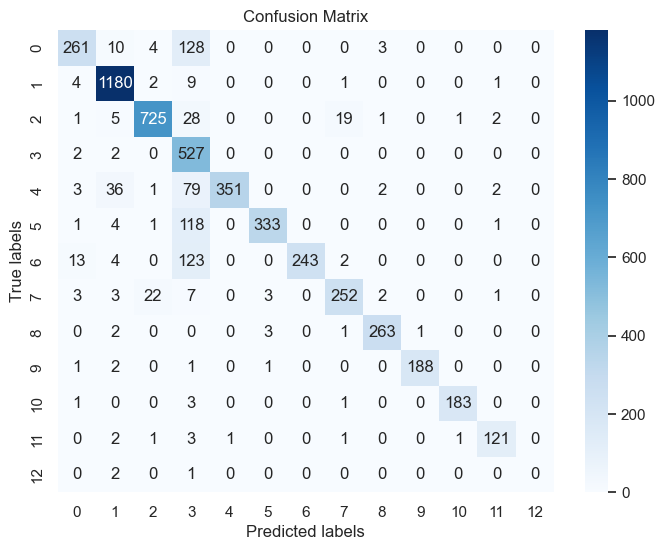

In [25]:
#Then, we evaluate our model on our testing data 
model_rnn.evaluate(X_test_padded, y_test)

#We generate predictions for Confustion Matrix 
rnn_y_pred = model_rnn.predict(X_test_padded)
rnn_y_pred = np.argmax(rnn_y_pred, axis=1)

#Evaluate our model on testing data
rnn_test_loss, rnn_test_accuracy = model_rnn.evaluate(X_test_padded, y_test)
print(f"\n RNN Test Loss: {rnn_test_loss}")
print(f" RNN Test Accuracy: {rnn_test_accuracy * 100:.2f}%")

print(classification_report(y_test,rnn_y_pred))

#And generate a confusion matrix
rnn_cm = confusion_matrix(y_test, rnn_y_pred)

#That we plot
plt.figure(figsize=(8, 6))
sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues')  
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

##### Code explanation: 

The code above evaluates our trained RNN model's performance on our testing data. First, it evaluates our model on our test set (X_test_padded and y_test) to calculate the loss and accuracy, which are printed to provide insight into the model's performance. Then, it generates predictions for the test data and converts these predictions from probability distributions to class labels using np.argmax. The model's performance on our testing data is evaluated again, and the test loss and accuracy are printed. A classification report is also generated to provide a detailed breakdown of precision, recall, and F1-score for each class. Following this, a confusion matrix is created using confusion_matrix to compare the true labels with the predicted labels. Finally, the confusion matrix is plotted as a heatmap using Seaborn to visually represent the number of correct and incorrect predictions, with true labels on one axis and predicted labels on the other.

In [26]:
#Then, we save our trained model
model_rnn.save('rnn_model.h5')
print("Model saved as rnn_model.h5")


Model saved as rnn_model.h5


##### Code explanation: 

The above code saves our trained RNN model to a file named rnn_model.h5 using the save method. This method  allows for easy storage and later retrieval. After saving the model, a confirmation message is printed to indicate that the model has been successfully saved with the specified filename. 

34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8819 - loss: 0.3414

 RNN Deploy Loss: 0.33799493312835693
 RNN Deploy Accuracy: 88.79%
              precision    recall  f1-score   support

           0       0.98      0.64      0.78        81
           1       0.94      0.98      0.96       242
           2       0.98      0.96      0.97       173
           3       0.51      1.00      0.68        99
           4       1.00      0.77      0.87       115
           5       0.98      0.67      0.80        79
           6       1.00      0.79      0.89        68
           7       0.98      0.91      0.94        64
           8       0.98      0.96      0.97        57
           9       0.97      0.97      0.97        32
          10       1.00      0.97      0.98        29
          11       0.95      0.95      0.95        22
          12       0.00      0.00      0.00         1

    accuracy                           0.89      1062
   macro

/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Applications/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


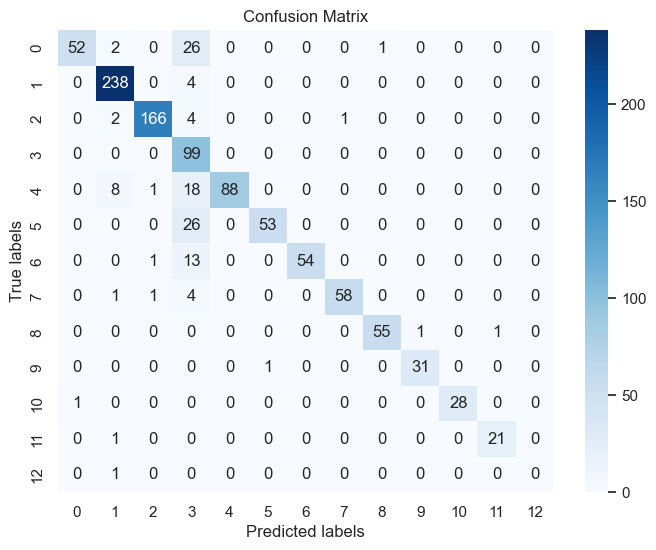

In [27]:
#We then generate predictions on deployment data
rnn_y_deploy_pred = model_rnn.predict(X_deploy_padded)
rnn_y_deploy_pred = np.argmax(rnn_y_deploy_pred, axis=1)

#And evaluate our model on deploy data
rnn_deploy_loss, rnn_deploy_accuracy = model_rnn.evaluate(X_deploy_padded, y_deploy)
print(f"\n RNN Deploy Loss: {rnn_deploy_loss}")
print(f" RNN Deploy Accuracy: {rnn_deploy_accuracy * 100:.2f}%")

print(classification_report(y_deploy, rnn_y_deploy_pred))

#And generate a confusion matrix
rnn_cm = confusion_matrix(y_deploy, rnn_y_deploy_pred)

#That we plot
plt.figure(figsize=(8, 6))
sns.heatmap(rnn_cm, annot=True, fmt='d', cmap='Blues') 
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


##### Code explanation: 

The above code generates predictions for our deployment data using our trained RNN model by calling predict on the padded deployment data and then applying np.argmax to convert the probabilities into class labels. It evaluates the model's performance on the deployment data by calculating the loss and accuracy, which are then printed. A classification_report is used to provide detailed metrics such as precision, recall, and F1-score for each class, which are also printed. Then, a confusion matrix is created to visualize the performance of the model by comparing predicted versus true labels, and this matrix is plotted using a heatmap for better interpretation. 

In [28]:
#We then define our rnn_deployment_df dataframe
rnn_deployment_df = pd.DataFrame({
    'text': X_deploy,
    'Emotion' : y_deploy,
    'Predicted Label': rnn_y_deploy_pred
})

print(rnn_deployment_df)

#And save it to a new CSV file
rnn_deployment_df.to_csv('deployment_predictions_with_text_rnn.csv', index=False)
print("Deployment predictions with text saved as deployment_predictions_with_text_rnn.csv")

                                                    text  Emotion  \
16408  stress make sure well peopl satisfi work rush ...        2   
1303    listen station hopeless feel hopeless feel enjoy        2   
3277   feel though lost signific part open mind due n...        0   
4547                                  feel love men abus        1   
20869             feel angri polic support case mad expo        6   
...                                                  ...      ...   
6077                                     hate feel annoy        5   
14253  fulli believ feel passion live brave outsid co...        4   
6913                 look better better time feel stupid        0   
12493  ive feel adventur late im also bit sad food ma...        3   
6195           woke rememb dream feel funni whole episod        7   

       Predicted Label  
16408                2  
1303                 2  
3277                 0  
4547                 1  
20869                6  
...                ..

##### Code explanation:

This code creates a rnn_deployment_df dataframe that includes  'text', 'Emotion', and 'Predicted Label' column. The 'text' column contains the text data from the deployment set, 'Emotion' includes the true labels, and 'Predicted Label' holds the predictions made by our RNN model. After printing the it to display its content, the code saves this dataframe to a CSV file named 'deployment_predictions_with_text_rnn.csv'. This file will contain the deployment data along with the true labels and our RNN model's predictions. 

Finally, we decided to visualise our RNN model training, testing and deployment accuracies.

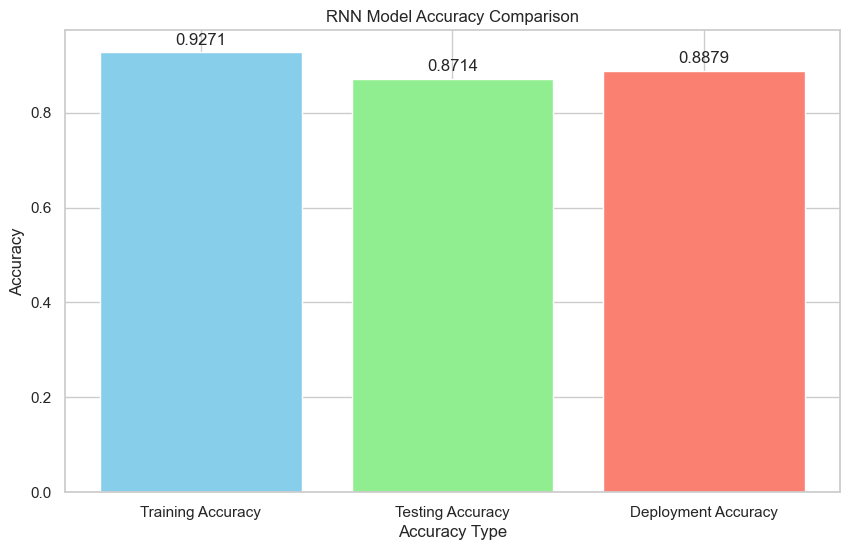

In [29]:
#We first define our accuracy values
rnn_accuracies = {
    'Training Accuracy': rnn_train_accuracy,
    'Testing Accuracy': rnn_test_accuracy,
    'Deployment Accuracy': rnn_deploy_accuracy
}

#Then, we create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(rnn_accuracies.keys(), rnn_accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])

#And add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

#Add labels and title before displaying the plot
ax.set_xlabel('Accuracy Type')
ax.set_ylabel('Accuracy')
ax.set_title('RNN Model Accuracy Comparison')
plt.show()


##### Code explanation:

The above code first defines "rnn_accuracies" as a dictionary to store the accuracy values for our RNN model on the training, testing, and deployment datasets. Indeed, the dictionary keys are 'Training Accuracy', 'Testing Accuracy', and 'Deployment Accuracy', and the corresponding values are the accuracy metrics obtained from evaluating our RNN model on these datasets. Then, it creates a bar chart using to visually compare these accuracies and displays it. 

Now, also based on our literature review, we define our CNN-GRU model, train it on our training data, test it on our testing data and deploy it on our deployment data.

In [30]:
#We first define our CNN-GRU model
model_cnn = Sequential()

#Add an embedding layer
model_cnn.add(Embedding(input_dim=input_size, output_dim=100, input_length=79))

#As well as a convolutional layer with 128 filters, kernel size of 5, and ReLU activation
model_cnn.add(Conv1D(filters=128, kernel_size=5, activation='relu'))

#A max pooling layer
model_cnn.add(MaxPooling1D(pool_size=2))

#A batch normalization layer
model_cnn.add(BatchNormalization())

#Then, we flatten the output to feed into fully connected layers
model_cnn.add(Bidirectional(GRU(128))) 

#Add dropout regularization
model_cnn.add(Dropout(0.5))

#And a dense layer with 64 units and ReLU activation
model_cnn.add(Dense(64, activation='relu'))

#A dropout regularization
model_cnn.add(Dropout(0.5))

#As well as the output layer with 13 units for 13 labels and softmax activation
model_cnn.add(Dense(13, activation='softmax'))

#Before compiling it
model_cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


/Applications/anaconda3/lib/python3.12/site-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


##### Code explanation:

The above code defines and compiles our CNN model combined with a Gated Recurrent Unit (GRU) for text classification. It first initializes a Sequential model and adds a first embedding layer to convert input words into dense vectors. Then, it adds a 1D convolutional layer with 128 filters and ReLU activation, capturing local patterns in the text. Following that, a max pooling layer reduces the dimensionality, and a batch normalization layer normalizes the outputs for stability. Then, a bidirectional GRU layer with 128 units captures sequence dependencies from both directions. After that, Dropout layers, each with a rate of 0.5, are added before and after a dense layer with 64 units and ReLU activation to prevent overfitting. Finally, the output layer that has 13 units with softmax activation to produce a probability distribution over the classes is added. The model is then compiled using the Adam optimizer, sparse categorical cross-entropy loss, and accuracy as the evaluation metric, creating a robust architecture for text classification.

In [31]:
#We then train our model 
cnn_history = model_cnn.fit(X_train_padded, y_train, epochs=20, batch_size=32, validation_data=(X_test_padded, y_test),callbacks=[EarlyStopping(patience=3)])

Epoch 1/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 12s 22ms/step - accuracy: 0.4521 - loss: 1.7189 - val_accuracy: 0.9540 - val_loss: 0.2865
Epoch 2/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9561 - loss: 0.1863 - val_accuracy: 0.9678 - val_loss: 0.1639
Epoch 3/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9778 - loss: 0.0871 - val_accuracy: 0.9680 - val_loss: 0.1439
Epoch 4/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 11s 23ms/step - accuracy: 0.9871 - loss: 0.0605 - val_accuracy: 0.9697 - val_loss: 0.2004
Epoch 5/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9907 - loss: 0.0417 - val_accuracy: 0.9682 - val_loss: 0.2102
Epoch 6/20
465/465 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.9902 - loss: 0.0413 - val_accuracy: 0.9678 - val_loss: 0.2031


In [32]:
#We generate our CNN-GRU model accuracy on train data
cnn_train_loss, cnn_train_accuracy = model_cnn.evaluate(X_train_padded, y_train)
print(f"\n CNN Train Loss: {cnn_train_loss}")
print(f" CNN Train Accuracy: {cnn_train_accuracy * 100:.2f}%")

465/465 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9963 - loss: 0.0119

 CNN Train Loss: 0.011647989973425865
 CNN Train Accuracy: 99.66%


166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9725 - loss: 0.1765
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step
166/166 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9725 - loss: 0.1765

 CNN Test Loss: 0.20310205221176147
 CNN Test Accuracy: 96.78%
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       406
           1       0.99      0.97      0.98      1197
           2       0.96      0.95      0.96       782
           3       0.99      0.98      0.98       531
           4       0.98      0.98      0.98       474
           5       0.98      0.99      0.98       458
           6       0.97      0.99      0.98       385
           7       0.89      0.91      0.90       293
           8       0.97      0.98      0.98       270
           9       0.99      0.98      0.99       193
          10       0.99      0.96      0.98       188
          11       0.93      0.97      0.95       130
          12       1.00      0.33      0.5

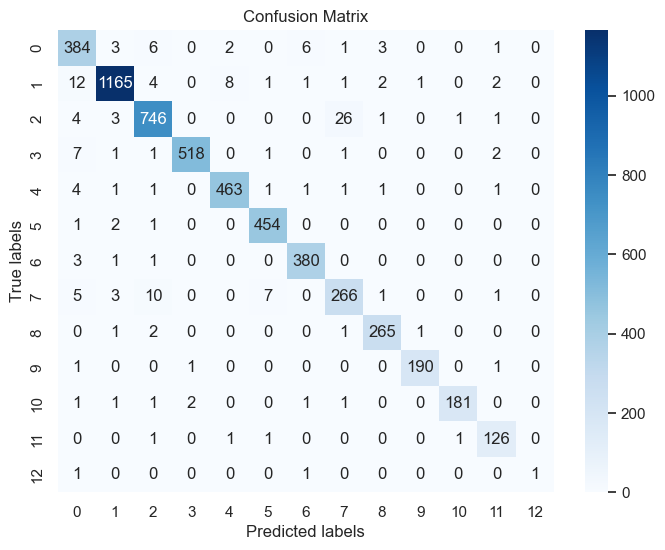

In [33]:
#Then, we evaluate our model on our testing data
model_cnn.evaluate(X_test_padded, y_test)

#We generate predictions for Confustion Matrix
cnn_y_pred = model_cnn.predict(X_test_padded)
cnn_y_pred = np.argmax(cnn_y_pred, axis=1)

#Evaluate our model on testing data
cnn_test_loss, cnn_test_accuracy = model_cnn.evaluate(X_test_padded, y_test)
print(f"\n CNN Test Loss: {cnn_test_loss}")
print(f" CNN Test Accuracy: {cnn_test_accuracy * 100:.2f}%")

print(classification_report(y_test,cnn_y_pred))

#And generate a confusion matrix
cnn_cm = confusion_matrix(y_test, cnn_y_pred)

#That we plot
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [34]:
#Then, we save our trained model
model_cnn.save('cnn_model.h5')
print("Model saved as cnn_model.h5")

Model saved as cnn_model.h5


34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
34/34 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9806 - loss: 0.1113

 CNN Deploy Loss: 0.09899283945560455
 CNN Deploy Accuracy: 98.21%
              precision    recall  f1-score   support

           0       0.99      0.95      0.97        81
           1       0.98      0.97      0.98       242
           2       0.99      0.98      0.99       173
           3       0.99      1.00      0.99        99
           4       0.98      0.98      0.98       115
           5       0.95      1.00      0.98        79
           6       0.99      1.00      0.99        68
           7       0.95      0.97      0.96        64
           8       0.98      1.00      0.99        57
           9       1.00      1.00      1.00        32
          10       1.00      1.00      1.00        29
          11       0.96      1.00      0.98        22
          12       1.00      1.00      1.00         1

    accuracy                           0.98      1062
   macro

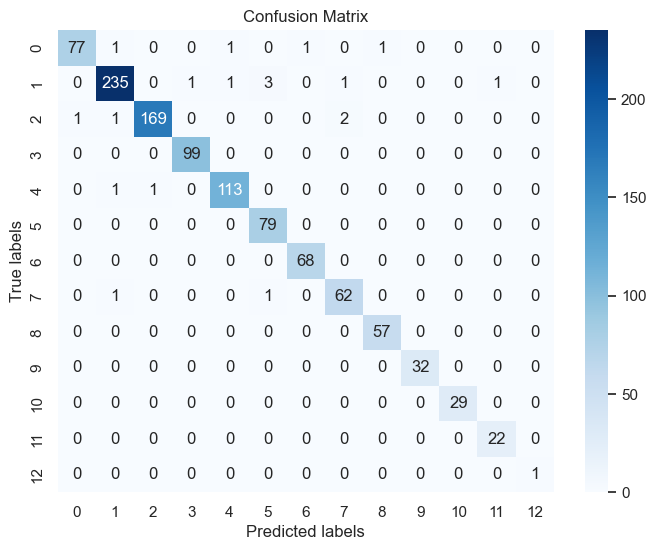

In [35]:
#We then generate predictions on deployment data
cnn_y_deploy_pred = model_cnn.predict(X_deploy_padded)
cnn_y_deploy_pred = np.argmax(cnn_y_deploy_pred, axis=1)

#And evaluate our model on deploy data
cnn_deploy_loss, cnn_deploy_accuracy = model_cnn.evaluate(X_deploy_padded, y_deploy)
print(f"\n CNN Deploy Loss: {cnn_deploy_loss}")
print(f" CNN Deploy Accuracy: {cnn_deploy_accuracy * 100:.2f}%")


print(classification_report(y_deploy, cnn_y_deploy_pred))

#And generate a confusion matrix
cnn_cm = confusion_matrix(y_deploy, cnn_y_deploy_pred)

#That we plot
plt.figure(figsize=(8, 6))
sns.heatmap(cnn_cm, annot=True, fmt='d', cmap='Blues')  # Change 'Reds' to 'Blues' for blue color
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

Finally, we decided to visualise our CNN model training, testing and deployment accuracies.

In [36]:
cnn_deployment_df = pd.DataFrame({
    'text': X_deploy,
    'Emotion' : y_deploy,
    'Predicted Label': cnn_y_deploy_pred
})

print(cnn_deployment_df)

# Save the updated deployment DataFrame to a CSV file
cnn_deployment_df.to_csv('deployment_predictions_with_text_cnn.csv', index=False)
print("Deployment predictions with text saved as deployment_predictions_with_text_cnn.csv")

                                                    text  Emotion  \
16408  stress make sure well peopl satisfi work rush ...        2   
1303    listen station hopeless feel hopeless feel enjoy        2   
3277   feel though lost signific part open mind due n...        0   
4547                                  feel love men abus        1   
20869             feel angri polic support case mad expo        6   
...                                                  ...      ...   
6077                                     hate feel annoy        5   
14253  fulli believ feel passion live brave outsid co...        4   
6913                 look better better time feel stupid        0   
12493  ive feel adventur late im also bit sad food ma...        3   
6195           woke rememb dream feel funni whole episod        7   

       Predicted Label  
16408                2  
1303                 2  
3277                 0  
4547                 1  
20869                6  
...                ..

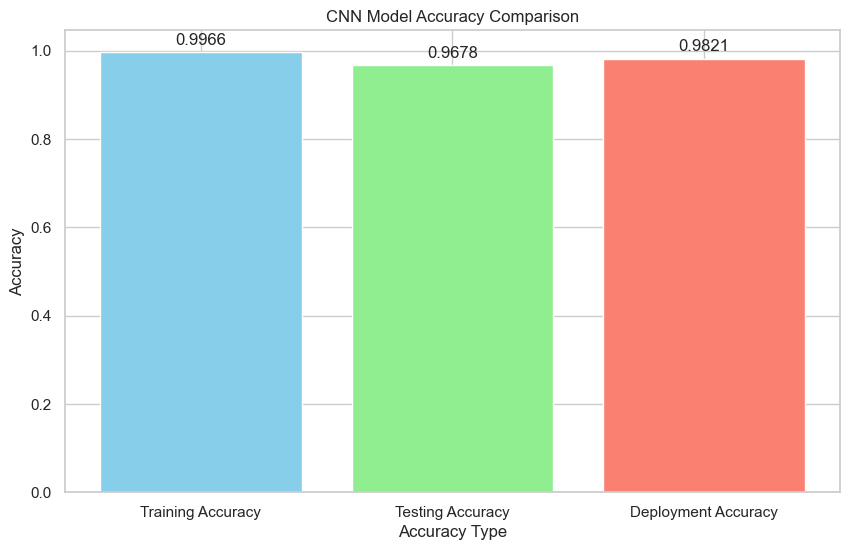

In [37]:
#We first define our accuracy values
cnn_accuracies = {
    'Training Accuracy': cnn_train_accuracy,
    'Testing Accuracy': cnn_test_accuracy,
    'Deployment Accuracy': cnn_deploy_accuracy
}

#Then, we create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
bars = ax.bar(cnn_accuracies.keys(), cnn_accuracies.values(), color=['skyblue', 'lightgreen', 'salmon'])

#And add accuracy values on top of the bars
for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

#Add labels and title before displaying the plot
ax.set_xlabel('Accuracy Type')
ax.set_ylabel('Accuracy')
ax.set_title('CNN Model Accuracy Comparison')
plt.show()

Finally, we decided to generate a bar plot that compares both our RNN-GRU and CNN-GRU accuracies. 

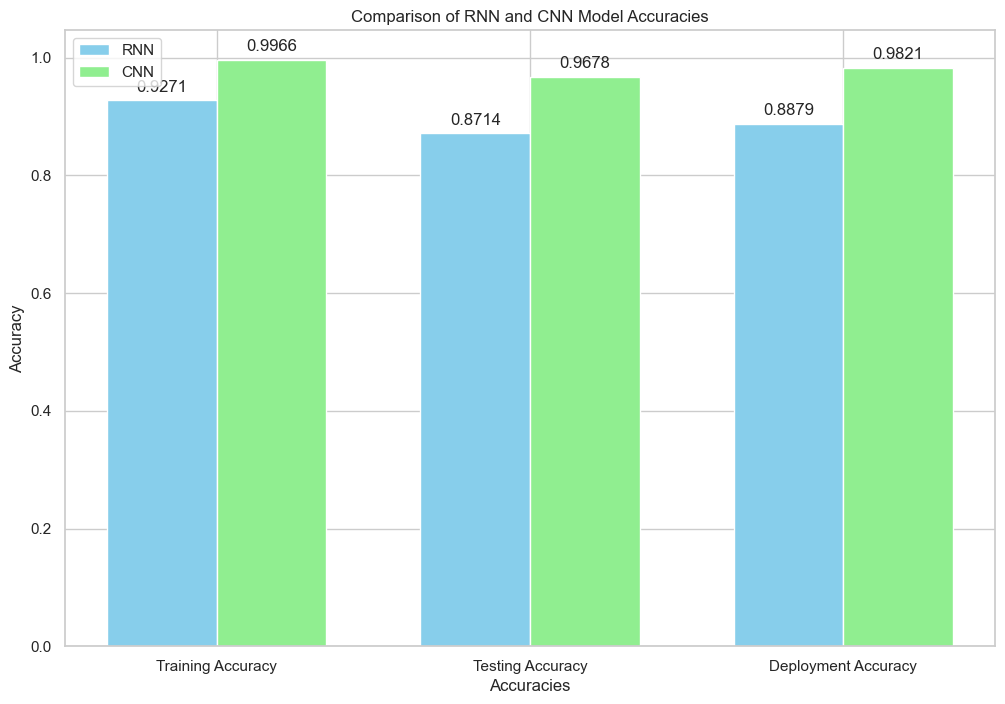

In [38]:
#We first extract labels and values for our RNN and CNN models
labels = list(rnn_accuracies.keys())
rnn_values = list(rnn_accuracies.values())
cnn_values = list(cnn_accuracies.values())

#We then set up the bar positions
x = np.arange(len(labels)) 
width = 0.35  

fig, ax = plt.subplots(figsize=(12, 8))

#And create bars for our RNN and CNN models
bars_rnn = ax.bar(x - width/2, rnn_values, width, label='RNN', color='skyblue')
bars_cnn = ax.bar(x + width/2, cnn_values, width, label='CNN', color='lightgreen')

#We then add labels and title
ax.set_xlabel('Accuracies')
ax.set_ylabel('Accuracy')
ax.set_title('Comparison of RNN and CNN Model Accuracies')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

#As well as accuracy values on top of the bars
for bar in bars_rnn:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

for bar in bars_cnn:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.4f}', ha='center', va='bottom')

#Before displaying our plot
plt.show()


##### Code explanation:

The above code compares the training, testing and deployment accuracies of our RNN and CNN models. First, it extracts the labels and accuracy values for both models from predefined dictionaries. Then, it generates a bar plot and displays accuracy values on top of each bar for better visualization. Finally, the plot is displayed, showing a clear comparison of our RNN and CNN model accuracies.

#### References: 

1. Abel, AK. (2023). Clever Cuts: Uncovering the Power of SelectKBest for Feature Selection in Machine Learning. [online] Medium. Available at: https://medium.com/@abelkuriakose/clever-cuts-uncovering-the-power-of-selectkbest-for-feature-selection-in-machine-learning-c8d20d75c82f.
2. Bhattbhatt, V. (2024). A Step-by-Step Guide to Early Stopping in TensorFlow and PyTorch. [online] Medium. Available at: https://medium.com/@vrunda.bhattbhatt/a-step-by-step-guide-to-early-stopping-in-tensorflow-and-pytorch-59c1e3d0e376.
3. Brownlee, J. (2016). How To Build Multi-Layer Perceptron Neural Network Models with Keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/build-multi-layer-perceptron-neural-network-models-keras/.
4. Brownlee, J. (2016). Sequence Classification with LSTM Recurrent Neural Networks in Python with Keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/sequence-classification-lstm-recurrent-neural-networks-python-keras/.
5. Brownlee, J. (2022). TensorFlow 2 Tutorial: Get Started in Deep Learning With tf.keras. [online] Machine Learning Mastery. Available at: https://machinelearningmastery.com/tensorflow-tutorial-deep-learning-with-tf-keras/.
6. Darmanin, A (2024). Temporal Convolution Neural Network for Markets. [online] Kaggle.com. Available at: https://www.kaggle.com/code/addarm/temporal-convolution-neural-network-for-markets [Accessed 18 Jul. 2024].
7. GeeksforGeeks (2017). Removing stop words with NLTK in Python. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/removing-stop-words-nltk-python/.
8. GeeksforGeeks (2018). Python | Lemmatization with NLTK. [online] GeeksforGeeks. Available at: https://www.geeksforgeeks.org/python-lemmatization-with-nltk/.
9. GeeksforGeeks (2021). NumPy - Arithmetic Operations. [online] Available at: https://www.geeksforgeeks.org/numpy-arithmetic-operations/ [Accessed 18 Jul. 2024].
10. Learnopencv (2017). Implementing an MLP in TensorFlow & Keras. [online] Available at: https://learnopencv.com/implementing-mlp-tensorflow-keras/.
11. Launch code education (no date) 8.10. the string module¶ . Available at: https://education.launchcode.org/data-analysis/chapters/strings/string-module.html (Accessed: 18 July 2024).
12. Malhotra, A. (2024). Working with LSTM with an Example - Ashish Malhotra - Medium. [online] Medium. Available at: https://medium.com/@ypredofficial/working-with-lstm-with-an-example-391ce15f97fa [Accessed 18 Jul. 2024].
13. Matplotlib (n.d.). Pyplot tutorial — Matplotlib 3.8.0 documentation. [online] matplotlib.org. Available at: https://matplotlib.org/stable/tutorials/pyplot.html.
14. NLTK (2009). Natural Language Toolkit — NLTK 3.4.4 documentation. [online] Nltk.org. Available at: https://www.nltk.org/.
15. Python (2009). re — Regular expression operations — Python 3.7.2 documentation. [online] Python.org. Available at: https://docs.python.org/3/library/re.html.
16. Raj, S. (2024). TensorFlow for Natural Language Processing (NLP):-. [online] Medium. Available at: https://medium.com/@shammypratap/tensorflow-for-natural-language-processing-nlp-a702ff95d330.
17. Sanketh, R.S. (2021). Text Preprocessing with NLTK. [online] Medium. Available at: https://towardsdatascience.com/text-preprocessing-with-nltk-9de5de891658.
18. Saxena, S (2021). Understanding Embedding Layer in Keras. [online] Analytics Vidhya. Available at: https://medium.com/analytics-vidhya/understanding-embedding-layer-in-keras-bbe3ff1327ce.
19. Scikit-learn (2018). sklearn.feature_extraction.text.CountVectorizer — scikit-learn 0.20.3 Documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html.
20. Scikit-learn (2018). sklearn.metrics.classification_report — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html.
21. Scikit-learn (2018). sklearn.model_selection.train_test_split — scikit-learn 0.20.3 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
22. Scikit-learn (2019). sklearn.metrics.accuracy_score — scikit-learn 0.22 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html.
23. Scikit-learn (2019). sklearn.model_selection.train_test_split — scikit-learn 0.22.1 documentation. [online] Scikit-learn.org. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html.
24. Scikit-learn.org. (2019). sklearn.naive_bayes.MultinomialNB — scikit-learn 0.22 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html.
25. Scikit-learn.org. (2019). sklearn.preprocessing.LabelEncoder — scikit-learn 0.22.1 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html.
26. Scikit-learn.org. (n.d.). sklearn.feature_selection.chi2 — scikit-learn 0.23.2 documentation. [online] Available at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.chi2.html.
27. Seaborn (n.d.). An introduction to seaborn — seaborn 0.12.1 documentation. [online] Available at: https://seaborn.pydata.org/tutorial/introduction.html.
28. Solomon, B (n.d.). Generating Random Data in Python (Guide) – Real Python. [online] realpython.com. Available at: https://realpython.com/python-random/.
29. SpaCy (n.d.). Linguistic Features · spaCy Usage Documentation. [online] Available at: https://spacy.io/usage/linguistic-features.
30. Tariq (2023). Comparing Approaches to Count the Frequency of Items in a List. [online] Medium. Available at: https://medium.com/@tarek.tm/three-ways-to-count-frequency-fc0c5d32cea8#:~:text=Using%20Counter%20from%20the%20Collections%20Module&text=In%20this%20approach%2C%20we%20first [Accessed 18 Jul. 2024].
31. Training, P. (2023). Guide to NLTK - Natural Language Toolkit for Python. [online] Pierian Training. Available at: https://pieriantraining.com/guide-to-nltk-natural-language-toolkit-for-python/ [Accessed 18 Jul. 2024].
32. Verma, P. (2022). Data Cleaning for Textual Data - Analytics Vidhya - Medium. [online] Medium. Available at: https://medium.com/analytics-vidhya/data-cleaning-for-textual-data-256b4bbffd [Accessed 18 Jul. 2024].
33. W3 School (n.d.). Pandas Tutorial. [online] Available at: https://www.w3schools.com/python/pandas/default.asp.